In [54]:
import torch
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from finta import TA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [55]:
btc = yf.Ticker("BTC-USD")

btc_df = btc.history(period="150d", interval="1h")
btc_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-05-23 00:00:00+00:00,30309.396484,30366.486328,30223.939453,30279.681641,0,0,0
2022-05-23 01:00:00+00:00,30279.126953,30279.126953,30166.138672,30186.585938,119132160,0,0
2022-05-23 02:00:00+00:00,30181.677734,30186.787109,30063.726562,30111.470703,261443584,0,0
2022-05-23 03:00:00+00:00,30109.414062,30165.431641,30098.164062,30140.417969,182704128,0,0
2022-05-23 04:00:00+00:00,30143.906250,30217.583984,30111.884766,30112.636719,112220160,0,0
...,...,...,...,...,...,...,...
2022-10-19 01:00:00+00:00,19261.246094,19319.835938,19246.019531,19316.408203,160532480,0,0
2022-10-19 02:00:00+00:00,19316.451172,19316.451172,19268.029297,19293.810547,106180608,0,0
2022-10-19 03:00:00+00:00,19295.166016,19305.230469,19276.460938,19303.015625,35715072,0,0
2022-10-19 04:00:00+00:00,19298.554688,19298.554688,19292.751953,19297.435547,2088960,0,0


In [56]:
btc_df = btc_df.drop(columns=["Dividends", "Stock Splits"])

btc_df

,Open,High,Low,Close,Volume
2022-05-23 00:00:00+00:00,30309.396484,30366.486328,30223.939453,30279.681641,0
2022-05-23 01:00:00+00:00,30279.126953,30279.126953,30166.138672,30186.585938,119132160
2022-05-23 02:00:00+00:00,30181.677734,30186.787109,30063.726562,30111.470703,261443584
2022-05-23 03:00:00+00:00,30109.414062,30165.431641,30098.164062,30140.417969,182704128
2022-05-23 04:00:00+00:00,30143.906250,30217.583984,30111.884766,30112.636719,112220160
...,...,...,...,...,...
2022-10-19 01:00:00+00:00,19261.246094,19319.835938,19246.019531,19316.408203,160532480
2022-10-19 02:00:00+00:00,19316.451172,19316.451172,19268.029297,19293.810547,106180608
2022-10-19 03:00:00+00:00,19295.166016,19305.230469,19276.460938,19303.015625,35715072
2022-10-19 04:00:00+00:00,19298.554688,19298.554688,19292.751953,19297.435547,2088960


In [57]:
bbands_df = TA.BBANDS(btc_df)
bbands_df

,BB_UPPER,BB_MIDDLE,BB_LOWER
2022-05-23 00:00:00+00:00,NaN,NaN,NaN
2022-05-23 01:00:00+00:00,NaN,NaN,NaN
2022-05-23 02:00:00+00:00,NaN,NaN,NaN
2022-05-23 03:00:00+00:00,NaN,NaN,NaN
2022-05-23 04:00:00+00:00,NaN,NaN,NaN
...,...,...,...
2022-10-19 01:00:00+00:00,19720.739157,19435.107422,19149.475687
2022-10-19 02:00:00+00:00,19694.005589,19418.048535,19142.091481
2022-10-19 03:00:00+00:00,19654.982824,19400.067285,19145.151746
2022-10-19 04:00:00+00:00,19634.640930,19387.076855,19139.512781


In [58]:
btc_df = pd.concat([btc_df, bbands_df], axis=1)
btc_df = btc_df.dropna()
btc_df

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER
2022-05-23 19:00:00+00:00,29896.271484,29896.271484,29208.916016,29208.916016,2100267008,30784.773762,30221.795801,29658.817839
2022-05-23 20:00:00+00:00,29172.878906,29401.455078,29133.951172,29323.880859,1418561536,30864.193775,30174.005762,29483.817748
2022-05-23 21:00:00+00:00,29324.541016,29430.617188,29303.478516,29369.654297,399099904,30911.302956,30133.159180,29355.015403
2022-05-23 22:00:00+00:00,29356.873047,29356.873047,29080.064453,29183.185547,169652224,30973.496011,30086.744922,29199.993833
2022-05-23 23:00:00+00:00,29186.378906,29186.871094,28975.560547,29101.042969,780578816,31024.169194,30034.776172,29045.383150
...,...,...,...,...,...,...,...,...
2022-10-19 01:00:00+00:00,19261.246094,19319.835938,19246.019531,19316.408203,160532480,19720.739157,19435.107422,19149.475687
2022-10-19 02:00:00+00:00,19316.451172,19316.451172,19268.029297,19293.810547,106180608,19694.005589,19418.048535,19142.091481
2022-10-19 03:00:00+00:00,19295.166016,19305.230469,19276.460938,19303.015625,35715072,19654.982824,19400.067285,19145.151746
2022-10-19 04:00:00+00:00,19298.554688,19298.554688,19292.751953,19297.435547,2088960,19634.640930,19387.076855,19139.512781


In [59]:
# Visualize close price for the investment
security_close = btc_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = btc_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = btc_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = btc_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower
bbands_plot

:Overlay
   .Curve.I   :Curve   [index]   (Close)
   .Curve.II  :Curve   [index]   (BB_UPPER)
   .Curve.III :Curve   [index]   (BB_MIDDLE)
   .Curve.IV  :Curve   [index]   (BB_LOWER)

In [60]:
rsi_df = TA.RSI(btc_df)

rsi_df

2022-05-23 19:00:00+00:00           NaN
2022-05-23 20:00:00+00:00    100.000000
2022-05-23 21:00:00+00:00    100.000000
2022-05-23 22:00:00+00:00     43.167186
2022-05-23 23:00:00+00:00     34.000183
                                ...    
2022-10-19 01:00:00+00:00     44.335918
2022-10-19 02:00:00+00:00     43.088351
2022-10-19 03:00:00+00:00     43.782304
2022-10-19 04:00:00+00:00     43.436538
2022-10-19 04:07:00+00:00     43.312760
Name: 14 period RSI, Length: 3563, dtype: float64

In [61]:
#btc_df = pd.concat([btc_df, rsi_df], axis=1)
btc_df["RSI"] = rsi_df
btc_df = btc_df.dropna()
btc_df

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,RSI
2022-05-23 20:00:00+00:00,29172.878906,29401.455078,29133.951172,29323.880859,1418561536,30864.193775,30174.005762,29483.817748,100.000000
2022-05-23 21:00:00+00:00,29324.541016,29430.617188,29303.478516,29369.654297,399099904,30911.302956,30133.159180,29355.015403,100.000000
2022-05-23 22:00:00+00:00,29356.873047,29356.873047,29080.064453,29183.185547,169652224,30973.496011,30086.744922,29199.993833,43.167186
2022-05-23 23:00:00+00:00,29186.378906,29186.871094,28975.560547,29101.042969,780578816,31024.169194,30034.776172,29045.383150,34.000183
2022-05-24 00:00:00+00:00,29101.125000,29227.765625,29083.347656,29150.365234,219727872,31050.873720,29986.662598,28922.451475,41.968987
...,...,...,...,...,...,...,...,...,...
2022-10-19 01:00:00+00:00,19261.246094,19319.835938,19246.019531,19316.408203,160532480,19720.739157,19435.107422,19149.475687,44.335918
2022-10-19 02:00:00+00:00,19316.451172,19316.451172,19268.029297,19293.810547,106180608,19694.005589,19418.048535,19142.091481,43.088351
2022-10-19 03:00:00+00:00,19295.166016,19305.230469,19276.460938,19303.015625,35715072,19654.982824,19400.067285,19145.151746,43.782304
2022-10-19 04:00:00+00:00,19298.554688,19298.554688,19292.751953,19297.435547,2088960,19634.640930,19387.076855,19139.512781,43.436538


In [62]:
btc_signals_df = pd.DataFrame()
btc_signals_df["Close"] = btc_df["Close"]

In [63]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
btc_signals_df["Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
for index, row in btc_df.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and ((row["RSI"] <= 30) or (row["RSI"] > 50 and row["RSI"] < 70)):
        btc_signals_df.loc[index, "Signal"] = 1.0
    if (row["Close"] > row["BB_UPPER"]) and ((row["RSI"] >= 70) or (row["RSI"] > 30 and row["RSI"] < 50)):
        btc_signals_df.loc[index,"Signal"] = -1.0

btc_signals_df["Signal"] = btc_signals_df["Signal"].astype(int)
btc_signals_df["Entry/Exit"] = btc_signals_df["Signal"].diff()        
        
# Review the DataFrame
btc_signals_df

,Close,Signal,Entry/Exit
2022-05-23 20:00:00+00:00,29323.880859,0,NaN
2022-05-23 21:00:00+00:00,29369.654297,0,0.0
2022-05-23 22:00:00+00:00,29183.185547,0,0.0
2022-05-23 23:00:00+00:00,29101.042969,0,0.0
2022-05-24 00:00:00+00:00,29150.365234,0,0.0
...,...,...,...
2022-10-19 01:00:00+00:00,19316.408203,0,0.0
2022-10-19 02:00:00+00:00,19293.810547,0,0.0
2022-10-19 03:00:00+00:00,19303.015625,0,0.0
2022-10-19 04:00:00+00:00,19297.435547,0,0.0


In [64]:
# Visualize entry position relative to close price
entry = btc_signals_df[btc_signals_df["Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = btc_signals_df[btc_signals_df["Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = btc_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_upper = btc_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


bb_middle = btc_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

bb_lower = btc_df[["BB_LOWER"]].hvplot(
    line_color='blue',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
bbands_plot = security_close * bb_upper * bb_middle * bb_lower * entry * exit
bbands_plot

:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Curve.II         :Curve   [index]   (BB_UPPER)
   .Curve.III        :Curve   [index]   (BB_MIDDLE)
   .Curve.IV         :Curve   [index]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [65]:
z = 1
PL = 0.00
start_price = (btc_df['Close'].head(1))
start_price = float(start_price)

end_price = (btc_df['Close'].tail(1))
end_price = float(end_price)

In [66]:
print("$BTC BBANDS/RSI Trading Results:", "\n")
print("The starting price is: $", round(start_price,2))
print("The ending price is: $", round(end_price,2), "\n")

#Getting buy and sell dates
for index, row in btc_signals_df.iterrows():
    if row['Signal'] == 1:
        if row['Entry/Exit'] != -1:
            if z == 1:
                print (index, round(row['Close'],2), '- Buy')
                close = row['Close']
                PL = PL - close
                z = z - 1 
    else:
        if row['Entry/Exit'] == -1:
            if z == 0:
                print (index, round(row['Close'],2), '- Sell')
                close = row['Close'] 
                PL = PL + close
                returns = (PL / start_price)
                return_pct = "{:.2%}".format(returns)
                print ("Total Profit/Loss is $",round(PL,2))
                print ("Total Return Percentage is", return_pct, "\n")
                z = z + 1
                    

                    
entire_hold_return = (end_price - start_price)
entire_hold_pct = "{:.2%}".format((end_price - start_price) / start_price)
print("The return for holding for the entire period was $", round(entire_hold_return,2), "or", entire_hold_pct, ".")
PL = 0.00   

$BTC BBANDS/RSI Trading Results: 

The starting price is: $ 29323.88
The ending price is: $ 19295.56 

2022-06-01 16:00:00+00:00 30429.2 - Buy
2022-06-01 19:00:00+00:00 30168.81 - Sell
Total Profit/Loss is $ -260.39
Total Return Percentage is -0.89% 

2022-06-01 20:00:00+00:00 29655.08 - Buy
2022-06-01 21:00:00+00:00 29640.39 - Sell
Total Profit/Loss is $ -275.07
Total Return Percentage is -0.94% 

2022-06-03 12:00:00+00:00 29560.98 - Buy
2022-06-03 13:00:00+00:00 29689.75 - Sell
Total Profit/Loss is $ -146.3
Total Return Percentage is -0.50% 

2022-06-07 00:00:00+00:00 30210.05 - Buy
2022-06-07 04:00:00+00:00 29540.78 - Sell
Total Profit/Loss is $ -815.57
Total Return Percentage is -2.78% 

2022-06-10 13:00:00+00:00 29411.09 - Buy
2022-06-10 14:00:00+00:00 29567.32 - Sell
Total Profit/Loss is $ -659.34
Total Return Percentage is -2.25% 

2022-06-10 16:00:00+00:00 29041.4 - Buy
2022-06-10 18:00:00+00:00 29039.73 - Sell
Total Profit/Loss is $ -661.01
Total Return Percentage is -2.25% 



In [67]:
pd.options.mode.chained_assignment = None

In [68]:
btc_df["Open"] = pd.to_numeric(btc_df["Open"])
btc_df["Open"].describe()

count     3562.000000
mean     22156.596509
std       3425.097695
min      17832.064453
25%      19748.218750
50%      21044.250000
75%      23264.297852
max      32176.480469
Name: Open, dtype: float64

In [69]:
btc_df["High"] = pd.to_numeric(btc_df["High"])
btc_df["High"].describe()

count     3562.000000
mean     22227.991641
std       3434.937498
min      18090.488281
25%      19796.541504
50%      21129.457031
75%      23349.752930
max      32249.863281
Name: High, dtype: float64

In [70]:
btc_df["Low"] = pd.to_numeric(btc_df["Low"])
btc_df["Low"].describe()

count     3562.000000
mean     22082.585372
std       3412.680496
min      17714.748047
25%      19681.252441
50%      20964.919922
75%      23185.549316
max      31936.126953
Name: Low, dtype: float64

In [71]:
btc_df["Close"] = pd.to_numeric(btc_df["Close"])
btc_df["Close"].describe()

count     3562.000000
mean     22153.804778
std       3423.541126
min      17744.896484
25%      19745.094727
50%      21046.594727
75%      23263.967285
max      32194.570312
Name: Close, dtype: float64

In [72]:
btc_df["Volume"] = pd.to_numeric(btc_df["Volume"])
btc_df["Volume"].describe()

count    3.562000e+03
mean     2.892601e+08
std      5.858876e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.601894e+07
75%      3.651702e+08
max      1.282124e+10
Name: Volume, dtype: float64

In [73]:
btc_df["BB_UPPER"] = pd.to_numeric(btc_df["BB_UPPER"])
btc_df["BB_UPPER"].describe()

count     3562.000000
mean     22649.421971
std       3537.582955
min      18985.400097
25%      20105.917001
50%      21512.090437
75%      23811.626840
max      32596.933727
Name: BB_UPPER, dtype: float64

In [74]:
btc_df["BB_MIDDLE"] = pd.to_numeric(btc_df["BB_MIDDLE"])
btc_df["BB_MIDDLE"].describe()

count     3562.000000
mean     22182.719089
std       3433.143589
min      18588.343848
25%      19767.663135
50%      21086.940430
75%      23243.465356
max      31762.626563
Name: BB_MIDDLE, dtype: float64

In [75]:
btc_df["BB_LOWER"] = pd.to_numeric(btc_df["BB_LOWER"])
btc_df["BB_LOWER"].describe()

count     3562.000000
mean     21716.016206
std       3365.192524
min      17610.491888
25%      19330.061334
50%      20489.303929
75%      22817.392729
max      31442.404050
Name: BB_LOWER, dtype: float64

In [76]:
btc_df["RSI"] = pd.to_numeric(btc_df["RSI"])
btc_df["RSI"].describe()

count    3562.000000
mean       48.728660
std        13.147838
min         9.983990
25%        40.274049
50%        48.632208
75%        57.079441
max       100.000000
Name: RSI, dtype: float64

In [77]:
btc_df= btc_df.astype(float)
btc_df

,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,RSI
2022-05-23 20:00:00+00:00,29172.878906,29401.455078,29133.951172,29323.880859,1.418562e+09,30864.193775,30174.005762,29483.817748,100.000000
2022-05-23 21:00:00+00:00,29324.541016,29430.617188,29303.478516,29369.654297,3.990999e+08,30911.302956,30133.159180,29355.015403,100.000000
2022-05-23 22:00:00+00:00,29356.873047,29356.873047,29080.064453,29183.185547,1.696522e+08,30973.496011,30086.744922,29199.993833,43.167186
2022-05-23 23:00:00+00:00,29186.378906,29186.871094,28975.560547,29101.042969,7.805788e+08,31024.169194,30034.776172,29045.383150,34.000183
2022-05-24 00:00:00+00:00,29101.125000,29227.765625,29083.347656,29150.365234,2.197279e+08,31050.873720,29986.662598,28922.451475,41.968987
...,...,...,...,...,...,...,...,...,...
2022-10-19 01:00:00+00:00,19261.246094,19319.835938,19246.019531,19316.408203,1.605325e+08,19720.739157,19435.107422,19149.475687,44.335918
2022-10-19 02:00:00+00:00,19316.451172,19316.451172,19268.029297,19293.810547,1.061806e+08,19694.005589,19418.048535,19142.091481,43.088351
2022-10-19 03:00:00+00:00,19295.166016,19305.230469,19276.460938,19303.015625,3.571507e+07,19654.982824,19400.067285,19145.151746,43.782304
2022-10-19 04:00:00+00:00,19298.554688,19298.554688,19292.751953,19297.435547,2.088960e+06,19634.640930,19387.076855,19139.512781,43.436538


In [78]:
btc_df[['Open']] = preprocessing.scale(btc_df[['Open']])
btc_df[['High']] = preprocessing.scale(btc_df[['High']])
btc_df[['Low']] = preprocessing.scale(btc_df[['Low']])
btc_df[['Close']] = preprocessing.scale(btc_df[['Close']])
btc_df[['Volume']] = preprocessing.scale(btc_df[['Volume']])
btc_df[['BB_UPPER']] = preprocessing.scale(btc_df[['BB_UPPER']])
btc_df[['BB_MIDDLE']] = preprocessing.scale(btc_df[['BB_MIDDLE']])
btc_df[['BB_LOWER']] = preprocessing.scale(btc_df[['BB_LOWER']])
btc_df[['RSI']] = preprocessing.scale(btc_df[['RSI']])
btc_df

C:\Users\Nia\anaconda3\envs\FinTech\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,Open,High,Low,Close,Volume,BB_UPPER,BB_MIDDLE,BB_LOWER,RSI
2022-05-23 20:00:00+00:00,2.048779,2.088676,2.066515,2.094639,1.927776,2.322469,2.328015,2.308603,3.900150
2022-05-23 21:00:00+00:00,2.093065,2.097167,2.116198,2.108011,0.187502,2.335787,2.316115,2.270322,3.900150
2022-05-23 22:00:00+00:00,2.102506,2.075695,2.050723,2.053537,-0.204177,2.353370,2.302594,2.224250,-0.423055
2022-05-23 23:00:00+00:00,2.052721,2.026196,2.020096,2.029540,0.838706,2.367697,2.287454,2.178299,-1.120378
2022-05-24 00:00:00+00:00,2.027826,2.038103,2.051685,2.043949,-0.118695,2.375246,2.273438,2.141764,-0.514200
...,...,...,...,...,...,...,...,...,...
2022-10-19 01:00:00+00:00,-0.845452,-0.846759,-0.831301,-0.828906,-0.219745,-0.827993,-0.800432,-0.762780,-0.334151
2022-10-19 02:00:00+00:00,-0.829332,-0.847744,-0.824851,-0.835508,-0.312526,-0.835551,-0.805401,-0.764974,-0.429052
2022-10-19 03:00:00+00:00,-0.835548,-0.851012,-0.822379,-0.832819,-0.432814,-0.846584,-0.810640,-0.764065,-0.376263
2022-10-19 04:00:00+00:00,-0.834558,-0.852955,-0.817605,-0.834449,-0.490216,-0.852335,-0.814424,-0.765741,-0.402565


In [79]:
target_price = btc_df[['Close']]
target_price = target_price.astype(float)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(btc_df, target_price, test_size = 0.2, random_state = 7)

In [82]:
dtype= torch.float
X_train_tensor = torch.tensor(X_train.values, dtype=dtype)
X_test_tensor = torch.tensor(X_test.values, dtype=dtype)

y_train_tensor = torch.tensor(y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)

In [83]:
inp = 9
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [84]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid, out))

In [85]:
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 0.9079276919364929
1000 0.5477495193481445
2000 0.3358539938926697
3000 0.20508579909801483
4000 0.1256590187549591
5000 0.07820837944746017
6000 0.050237979739904404
7000 0.03388070687651634
8000 0.024320611730217934
9000 0.018684474751353264


In [86]:
torch.save(model, 'btc price')

In [87]:
saved_model = torch.load('btc price')

In [88]:
y_pred_tensor = saved_model(X_test_tensor)

In [89]:
y_pred = torch.flatten(y_pred_tensor).detach().numpy()

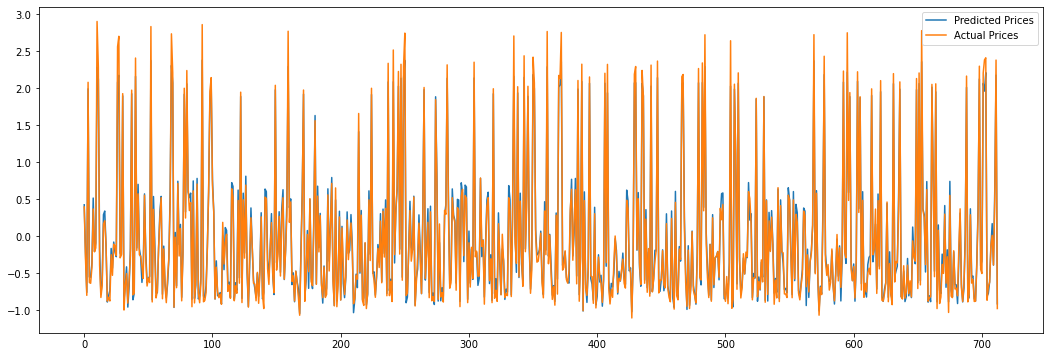

In [90]:
plt.figure(figsize=(18,6))
plt.plot(y_pred, label='Predicted Prices')
plt.plot(y_test['Close'].values, label = 'Actual Prices')

plt.legend()
plt.show()

In [91]:
y_test.loc[y_test['Close'] < -0.04, 'Close'] = -1.0
y_test.loc[y_test['Close'] >= -0.04, 'Close'] = 1.0
y_true = y_test

y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Close']
y_pred.loc[y_pred['Close'] < -0.04, 'Close'] = -1.0
y_pred.loc[y_pred['Close'] >= -0.04, 'Close'] = 1.0

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99       469
         1.0       0.98      0.99      0.98       244

    accuracy                           0.99       713
   macro avg       0.98      0.99      0.99       713
weighted avg       0.99      0.99      0.99       713

